<a href="https://colab.research.google.com/github/elhamkashi/DSPS_EKashi/blob/main/HW9/clusteringGenes_visualization_improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
import scipy as sp
from scipy import spatial
import seaborn as sns
import matplotlib.pyplot as plt

%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/refs/heads/main/fbb.mplstyle")
np.set_printoptions(precision=2)
rcParams['figure.figsize'] = 10, 10


Populating the interactive namespace from numpy and matplotlib


This is a dataset of gene expressions - the original data is described here https://manualzz.com/doc/25569970/dkfz-kidpack-gene-expression-data-technical-guide : its a dataset of genomic expressions used for Renal Cancer research

In [27]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/refs/heads/main/data/kidpackgenes.csv", index_col=0)

In [28]:
genes.head()

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


# 1. explore the data.

In [29]:
genes.shape

(4224, 74)

In [30]:
genes.describe()

,1,2,3,4,5,6,7,8,10,11,...,76,77,78,79,81,83,84,85,86,87
count,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,...,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000
mean,-0.094115,-0.027780,-0.001672,-0.110167,-0.047817,-0.000598,-0.043284,-0.029803,-0.055334,-0.017651,...,-0.033086,-0.050599,-0.023801,-0.042946,0.020522,-0.051150,0.004469,-0.001898,-0.143864,-0.002374
std,0.502677,0.340808,0.328042,0.692851,0.434918,0.348743,0.377675,0.350009,0.477607,0.353382,...,0.482347,0.410243,0.327410,0.354847,0.389799,0.401593,0.479766,0.487669,0.532901,0.346003
min,-2.205219,-1.779857,-3.072872,-3.491640,-2.479485,-2.767680,-1.807954,-1.835609,-3.214822,-2.205530,...,-2.946771,-3.281180,-2.787443,-1.938678,-2.932198,-3.054572,-3.189679,-2.955538,-2.909000,-1.563549
25%,-0.394770,-0.227638,-0.182975,-0.528570,-0.277542,-0.178646,-0.292570,-0.223971,-0.312487,-0.227375,...,-0.315895,-0.298579,-0.191197,-0.259851,-0.207651,-0.259171,-0.242053,-0.264326,-0.441299,-0.210836
50%,-0.069031,-0.016486,-0.014913,-0.046870,-0.018104,0.021162,-0.072925,-0.018363,-0.066373,-0.008910,...,-0.026565,-0.042374,-0.010210,-0.015849,-0.001221,-0.024906,-0.006854,-0.021976,-0.095412,-0.016940
75%,0.235924,0.178946,0.167848,0.376756,0.217731,0.208004,0.168238,0.182520,0.205242,0.195324,...,0.241220,0.200383,0.160373,0.195828,0.226961,0.195206,0.243014,0.237617,0.208726,0.189075
max,2.403599,1.609597,2.357123,1.987768,2.278563,2.106546,1.957411,1.807777,2.719371,3.194689,...,3.058383,1.960692,1.940195,1.352897,2.451836,1.733719,2.586922,3.230761,1.583828,1.694063


In [31]:
genes.isna().sum().sum()

np.int64(0)

There are no missing values. The data consistes of 4224 observations and 75 gene expressions. A quick google search shows that this is as expected: https://www.bioconductor.org/packages/devel/data/experiment/manuals/kidpack/man/kidpack.pdf

array([[<Axes: xlabel='1', ylabel='1'>, <Axes: xlabel='2', ylabel='1'>,
        <Axes: xlabel='3', ylabel='1'>, ...,
        <Axes: xlabel='85', ylabel='1'>, <Axes: xlabel='86', ylabel='1'>,
        <Axes: xlabel='87', ylabel='1'>],
       [<Axes: xlabel='1', ylabel='2'>, <Axes: xlabel='2', ylabel='2'>,
        <Axes: xlabel='3', ylabel='2'>, ...,
        <Axes: xlabel='85', ylabel='2'>, <Axes: xlabel='86', ylabel='2'>,
        <Axes: xlabel='87', ylabel='2'>],
       [<Axes: xlabel='1', ylabel='3'>, <Axes: xlabel='2', ylabel='3'>,
        <Axes: xlabel='3', ylabel='3'>, ...,
        <Axes: xlabel='85', ylabel='3'>, <Axes: xlabel='86', ylabel='3'>,
        <Axes: xlabel='87', ylabel='3'>],
       ...,
       [<Axes: xlabel='1', ylabel='85'>, <Axes: xlabel='2', ylabel='85'>,
        <Axes: xlabel='3', ylabel='85'>, ...,
        <Axes: xlabel='85', ylabel='85'>,
        <Axes: xlabel='86', ylabel='85'>,
        <Axes: xlabel='87', ylabel='85'>],
       [<Axes: xlabel='1', ylabel='86'>, <

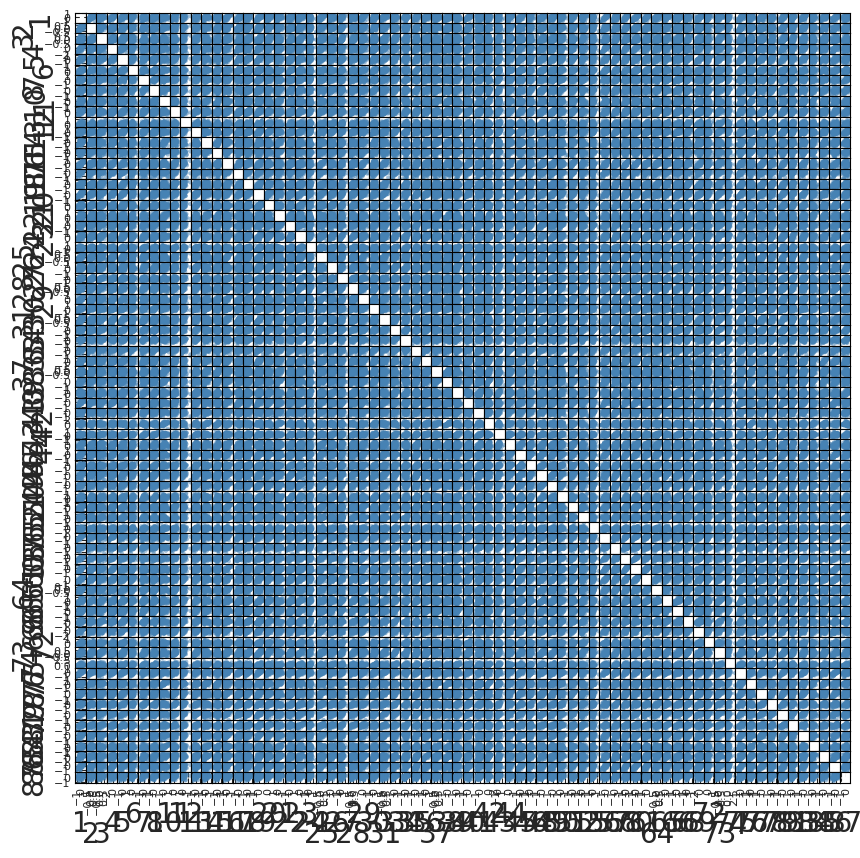

In [32]:
np.random.seed(302)
pd.plotting.scatter_matrix(genes.iloc[np.random.randint(0, genes.shape[0], 100)])

It's a mess!  the data is too high dimensional for a regular visualization!


This plot represents dataset gene-expression levels from the kidpackgenes.csv file, where each column corresponds to a specific gene and each row represents an individual biological sample. The numerical values quantify how actively each gene is expressed — a key measure in molecular biology for understanding gene behavior across samples.

The scatter matrix compares every pair of genes to explore possible correlations in their expression patterns. Each off-diagonal subplot shows a scatterplot of two genes' expression levels, while the diagonal displays each gene's distribution (typically as a histogram or density plot).

**However, the visualization suffers from several critical flaws:** Random sampling of only 100 points from a larger dataset introduces sampling bias and ambiguity. The high dimensionality (84 genes → 3,486 pairwise comparisons) creates overwhelming visual clutter with overlapping labels, redundant mirrored panels, and unreadably small scatter areas. This illustrates why scatterplot matrices become ineffective for large multivariate datasets, violating Tufte's principles against redundancy and chart junk.

# Evaluation of the Scatter Matrix

**Overall Issue**
Visual clutter dominates, preventing identification of meaningful gene correlations. The viewer focuses on repetitive design elements rather than data relationships.

**Critical Failures**

**1. Ambiguity & Distraction**

    * No title and unreadable overlapping labels
    * Too many tiny subplots (3,486 pairs for 84 genes)
    * Impossible to interpret specific relationships
    * Design noise overwhelms meaningful data patterns


**2. Distortion & Lie Factor**

    * All relationships appear equally noisy due to small plot sizes
    * Cannot distinguish strong from weak correlations
    * Visual representation doesn't scale with actual effect sizes
    * Lie factor << 1: weak visual representation of true correlations


**3. Poor Data-Ink Ratio**

    * Excessive ink on gridlines and repeated axes
    * Each gene pair shown twice (upper/lower triangle)
    * Diagonal self-correlations add no information
    * Data-ink ratio << 1: more decoration than data communication


***Recommended Solution***

Replace with a **correlation heatmap ** that:

    * Uses color to directly represent Pearson correlation values
    * Eliminates redundancy by masking one triangle
    * Provides clear color scale and clustering
    * Maximizes data-ink ratio by removing chart junk
    * Makes correlation patterns immediately visible


| Criterion           | Evaluation                                   | Result      |
| ------------------- | -------------------------------------------- | ----------- |
| Ambiguity           | Overlapping labels and unreadable axes       | ❌ Poor      |
| Distortion          | Perceptual distortion (patterns not visible) | ⚠️ Moderate |
| Distraction         | Overloaded and repetitive                    | ❌ Poor      |
| Effect size = 1     | Relationships not visually proportional      | ❌ Fails     |
| Data/Ink >> 1        | Wasted ink on redundant subplots             | ❌ Fails     |
| No Chart Junk       | Structural redundancy counts as junk         | ❌ Fails     |
| Use Small Multiples | Too many to interpret                        | ❌ Fails     |
| Avoid Redundancy    | Same pairs repeated twice                    | ❌ Fails     |


# First improvement: Gneral heatmap

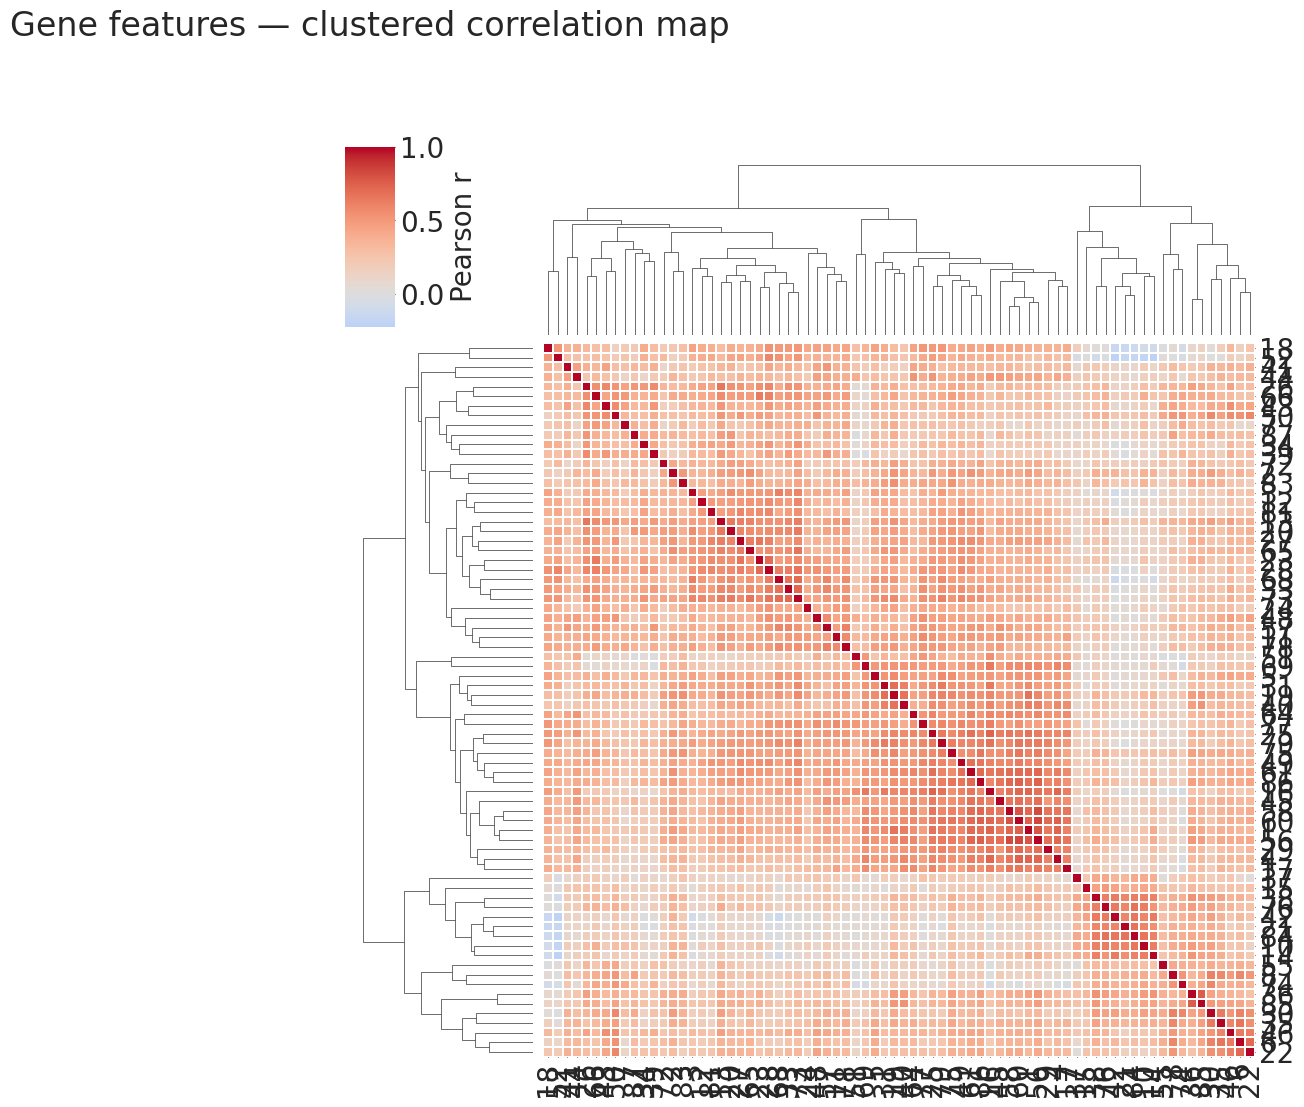

In [33]:



corr = genes.corr(numeric_only=True)           # summary, not raw scatter
# keep order informative: hierarchical clustering
link = sns.clustermap(corr, cmap="coolwarm", center=0, row_cluster=True, col_cluster=True,
                      linewidths=0.2, figsize=(10,10), cbar_kws=dict(label="Pearson r"),
                      xticklabels=True, yticklabels=True)
#Both rows and columns are clustered hierarchically (row_cluster=True, col_cluster=True)
#Uses a blue-white-red color scheme (cmap="coolwarm") centered at 0
#Shows Pearson correlation coefficients (r values) as colors
plt.title("Gene features — clustered correlation map", pad=80)
plt.show()


This clustered correlation heatmap summarizes relationships among all gene features in the kidpackgenes dataset. Each cell represents the Pearson correlation coefficient (r) between a pair of genes, with color intensity directly proportional to relationship strength—red for positive correlation, blue for negative, and white for no correlation. Hierarchical clustering reorganizes genes by similarity, grouping co-expressed genes together to reveal biological patterns that were completely hidden in the original scatterplot matrix.

**Improvements over scatterplot matrix:**
- **Eliminates redundancy**: Removes 1,743 duplicate scatterplots
- **High data-ink ratio**: Every visual element conveys meaningful correlation data  
- **Pattern discovery**: Clustering reveals gene groups with similar expression behavior
- **Clear scaling**: Color intensity directly represents correlation strength (lie factor ≈ 1)

**Remaining limitations:**
- **Label clutter**: With 84 genes, axis labels remain unreadable due to overlap
- **Context trade-off**: Clustering prioritizes statistical patterns over biological grouping
- **Dimensional challenge**: Still attempts to display 3,486 relationships in one view

# Comparison between original  code and the heatmap code:

-**Original code** :

-np.random.seed(362)

-pd.plotting.scatter_matrix(genes.iloc[np.random.randint(0, genes.shape[0], 196)]):

**Ambiguity & Distraction:** The most critical failure. By randomly sampling only 196 points from a presumably large dataset, it creates massive ambiguity. The viewer cannot tell if the patterns they see represent the true structure of the full dataset or are just artifacts of a small, random sample. This is a form of lying with data.

**Chart Junk & Poor Data/Ink Ratio:** A scatterplot matrix of many variables creates a grid of hundreds of tiny plots. The ink used for the grid lines, axes, and labels often overwhelms the actual data points, which are crammed into small, low-resolution panels. It's visually noisy and difficult to read.

**Inefficient for Comparison (Violates Small-Multiples):** While it is a small-multiple, it's a poorly executed one. The goal is to compare relationships, but the random sampling undermines this. Furthermore, the order of variables is likely arbitrary, making it hard to spot meaningful groups or patterns.

**Shows Design Variation, Not Data Variation:** The primary "design" here is the random sampling, which introduces artificial variation that obscures the true data variation.

**In short, The original is ambiguous, potentially misleading, and visually cluttered.**

and the heatmap code:

**Second Code: The Clustered Correlation Heatmap (Does Better)**

-corr = genes.corr(numeric_only=True)

-sns.clustermap(corr, ...)

**1-Defeats Ambiguity & Distortion:** It uses the entire dataset to calculate the correlation matrix (genes.corr()). There is no arbitrary sampling. The representation is direct: color hue and saturation are directly proportional to the Pearson correlation coefficient, respecting the "lie factor ~ 1" principle.

**2-Extremely High Data/Ink Ratio:** Almost every element carries meaning.

Ink for Data: The color of each cell is a data point (a correlation value).

Ink for Structure: The dendrograms are ink that reveals the hierarchical clustering structure of the data.

**3-Clear title and colorbar:** It has a title, a labeled colorbar

**4-No Chart Junk:** The design is minimal and functional. The lines, colors, and labels all serve to illuminate the data's structure. It "shows data variation, not design variation."

**4-Intelligent Small-Multiples (in a way):** While it's a single plot, the clustering algorithm automatically groups similar variables, creating a form of organized, intelligent comparison. You can instantly see which gene features are correlated (red blocks) and which are anti-correlated (blue blocks).

# **A better improvement can be: **

using :

-**np.triu()** to create a mask for the upper triangle (above the diagonal).

-that part is hidden, the visible part that remains is the lower triangle (below the diagonal).

-the hidden part shows the same pattern as visible part

-The primary advantage is that it directly addresses redundancy and reduces visual clutter, adhering to Tufte's principles.

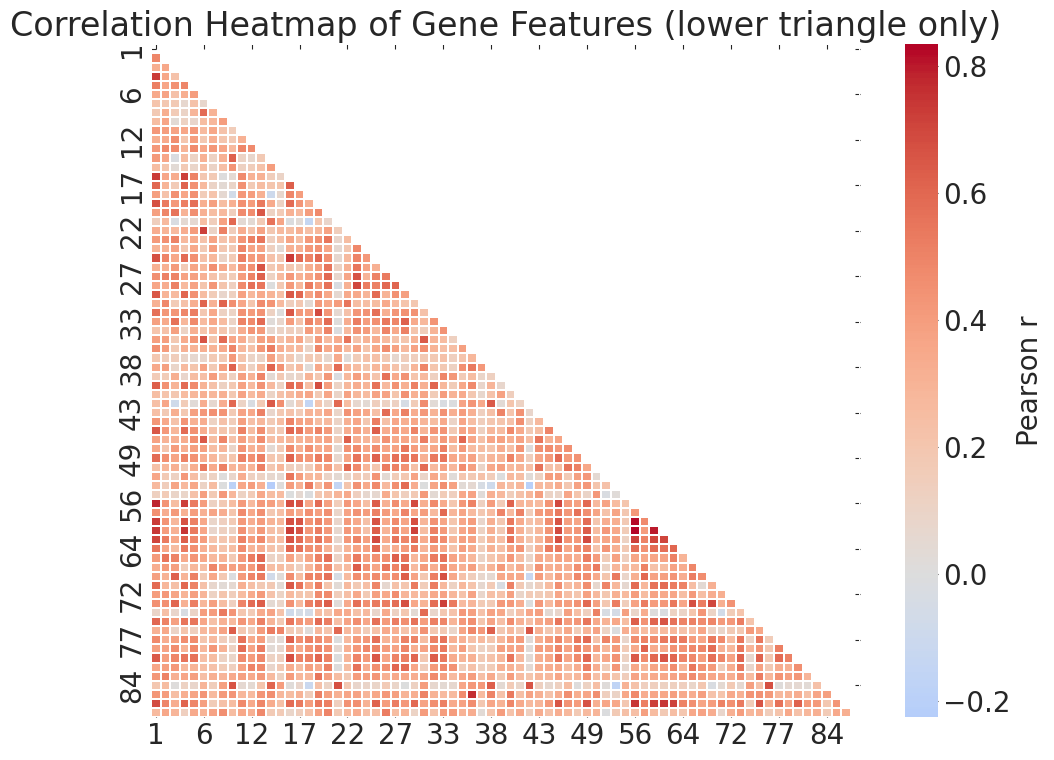

In [34]:


corr = genes.corr(numeric_only=True)


# Mask the lower triangle (to avoid redundant info)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, linewidths=0.3,
            cbar_kws=dict(label="Pearson r"), xticklabels=5, yticklabels=5)
plt.title("Correlation Heatmap of Gene Features (lower triangle only)")
plt.tight_layout()
plt.show()


**Why this is a better improvement**

*Eliminates Redundancy:*
- Masks the upper triangle, removing 50% of duplicated information from the symmetric correlation matrix
- Directly follows Tufte's "avoid redundancy in communication" principle

*Solves Readability:*
- `xticklabels=5, yticklabels=5` prevents label overlap while maintaining orientation
- Clean axes remain interpretable without visual clutter

*Focuses on Core Message:*
- Color scale and Pearson r colorbar emphasize correlation patterns
- Simplified triangular layout reduces cognitive load
- Directs attention to biological relationships rather than design elements

*Maximizes Data-Ink Ratio:*
- Removes redundant gridlines and duplicate correlations
- Every visible element conveys unique information
- Higher information density than both previous visualizations

**Minor limitation**

This version doesn’t show how genes cluster together like the dendrogram version did, in other words, it loses the hierarchical clustering information (the dendrogram) that helps group genes with similar correlation patterns.


# Conclusion

The choice between visualization approaches represents a fundamental trade-off in data communication:

**Masked Heatmap** → Best for **clear communication** and **specific lookups** of known correlations  
- Prioritizes readability and eliminates redundancy
- Ideal for confirming hypotheses or presenting results

**Clustered Heatmap** → Best for **pattern discovery** and **exploratory analysis**  
- Reveals hidden structures through hierarchical grouping  
- Ideal for generating new hypotheses and finding biological insights

**In practice**: Use the masked version when you know what you're looking for, and the clustered version when you're exploring what might be there.

The best plot can be both heatmaps side-by-side,, without dataset axes labeling:

The fundamental problem with  84 gene labels is that they are impossible to read clearly at any reasonable plot size, making them "chart junk."

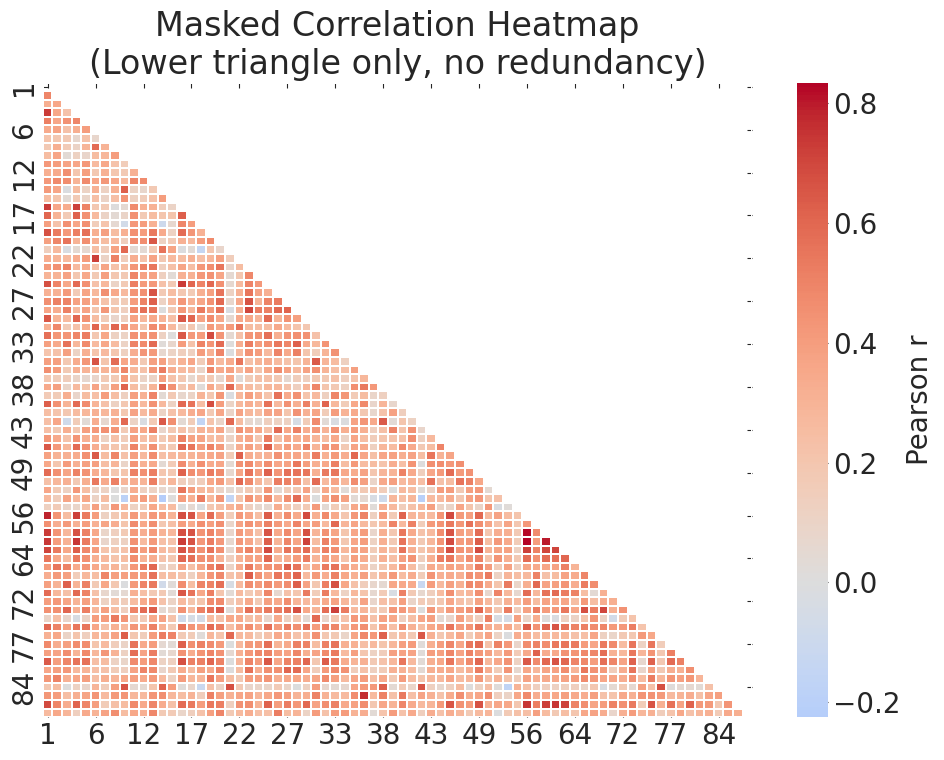

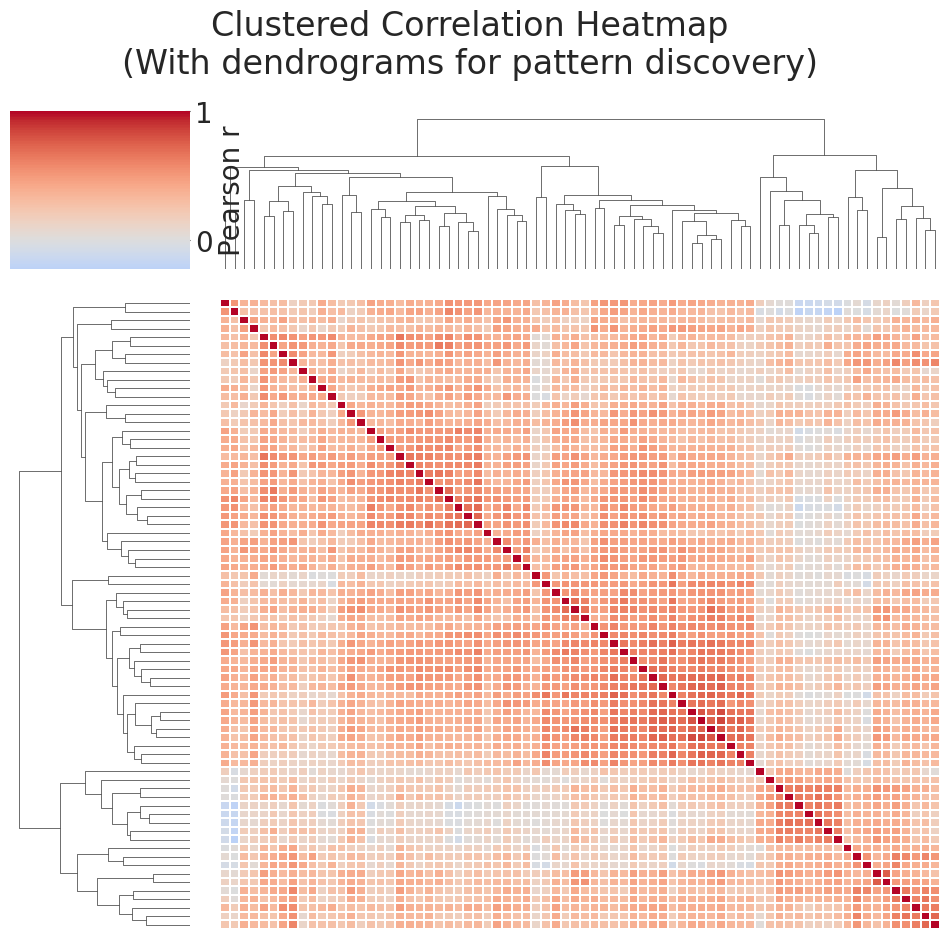

In [35]:



corr = genes.corr(numeric_only=True)

# Create a figure for the masked heatmap only
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, linewidths=0.3,
            cbar_kws=dict(label="Pearson r"), xticklabels=5, yticklabels=5)
plt.title("Masked Correlation Heatmap\n(Lower triangle only, no redundancy)")
plt.tight_layout()
plt.show()

# Create SEPARATE figure for the clustered heatmap
g = sns.clustermap(corr, cmap="coolwarm", center=0,
                   row_cluster=True, col_cluster=True,
                   linewidths=0.2, figsize=(10, 10),
                   cbar_kws={'label': 'Pearson r'},
                   xticklabels=False, yticklabels=False)
g.fig.suptitle("Clustered Correlation Heatmap\n(With dendrograms for pattern discovery)", y=0.95)
plt.tight_layout()
plt.show()

# Caption:
  This code generates two complementary visualizations of correlation patterns in gene expression data. The first plot displays a masked heatmap showing only the lower triangle of the correlation matrix to eliminate redundant information. The numbers 1-84 on both axes represent the column indices of the original dataset - these are the actual positions of the 84 numeric variables (genes) in the DataFrame, with xticklabels=5, yticklabels=5 displaying every 5th label for readability. Each cell's color corresponds to the Pearson correlation coefficient (r) shown in the colorbar, which quantifies linear relationships between gene pairs from -1 (perfect negative correlation, blue) to +1 (perfect positive correlation, red), with 0 (white) indicating no linear relationship.


  The second visualization employs hierarchical clustering to rearrange genes based on similarity, grouping correlated features together. The dendrograms on top and left show clustering relationships, revealing natural groupings in the data. Both visualizations omit detailed labels to maintain clarity while preserving the overall correlation structure, making them effective for pattern discovery despite the high dimensionality of 84 genetic features.

  Note: Perfect Negative Correlation (r = -1) means that two variables have an exact, predictable inverse relationship.

## Explanation of Visualization Improvements

### Original Plot
A `pd.plotting.scatter_matrix` showing all pairwise relationships between 84 gene features.

### Final Plots
Two complementary correlation heatmaps:
- **Clustered correlation matrix** with hierarchical clustering
- **Masked correlation matrix** showing only non-redundant lower triangle

### Changes Made and Rationale

#### 1. **Replaced Scatterplot Matrix with Correlation Heatmaps**
- **Problem**: The scatterplot matrix created 3,486 tiny, unreadable subplots with overwhelming visual clutter
- **Solution**: Heatmaps summarize relationships using color encoding, making correlation patterns immediately visible
- **Principle Applied**: Show data variation, not design variation

#### 2. **Eliminated Redundancy**
- **Problem**: Scatterplot matrix showed each correlation twice in mirrored panels
- **Solution**: Masked heatmap removes duplicate upper triangle
- **Principle Applied**: Avoid redundancy in communication

#### 3. **Added Hierarchical Clustering**
- **Problem**: Fixed alphabetical gene order hid underlying data structure
- **Solution**: Clustered heatmap groups genes by similarity, revealing co-expression patterns
- **Principle Applied**: Use small multiples effectively for comparisons

#### 4. **Improved Data-Ink Ratio**
- **Problem**: Excessive ink wasted on gridlines, axes, and redundant elements
- **Solution**: Heatmaps use color as primary encoding, removing non-data ink
- **Principle Applied**: Maximize data-ink ratio

#### 5. **Removed Unreadable Labels**
- **Problem**: 84 overlapping gene names created "chart junk"
- **Solution**: Omitted detailed labels to focus on global patterns
- **Principle Applied**: Clear, detailed labeling should defeat graphical distortion

### Conclusion
The new visualizations transform an unreadable scatterplot matrix into interpretable summaries that reveal the true correlation structure of the gene expression data, following Tufte's principles of graphical excellence.